In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [2]:
data = pd.read_csv('POPTHM.csv', sep = ',', encoding = 'utf-8')

In [3]:
# Replace non-numeric values with NaN
data['POPTHM'] = pd.to_numeric(data['POPTHM'], errors='coerce')

# Drop rows with missing values (NaN)
data.dropna(inplace=True)

In [6]:
df = pd.DataFrame()
df['ds'] = data['DATE']
df['y'] = data['POPTHM']
df.head()

,ds,y
0,1959-01-01,178504.0
1,1960-01-01,182225.0
2,1961-01-01,185129.0
3,1962-01-01,187905.0
4,1963-01-01,190570.0


In [7]:
 
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [9]:
future = m.make_future_dataframe(periods=12 * 5,
                                 freq='M')

In [10]:
 
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
120,2027-08-31,117852.895916,116773.200102,118919.435014,181954.757483,181264.167604,182576.471879
121,2027-09-30,183596.830838,182543.023131,184638.038156,182117.793019,181410.197360,182757.423526
122,2027-10-31,266055.229924,264943.039116,267202.380345,182286.263072,181543.101810,182944.737471
123,2027-11-30,289982.562826,288803.173846,291108.654064,182449.298608,181688.923271,183130.790671
124,2027-12-31,349359.371850,348219.259144,350403.376344,182617.768661,181836.183397,183316.787291


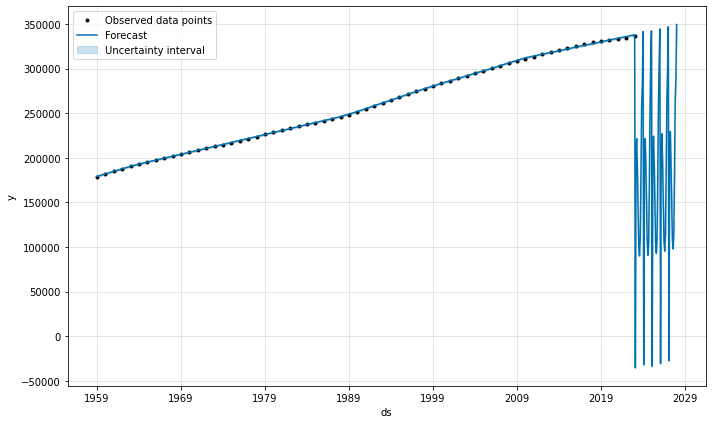

In [11]:
 
fig1 = m.plot(forecast, include_legend=True)

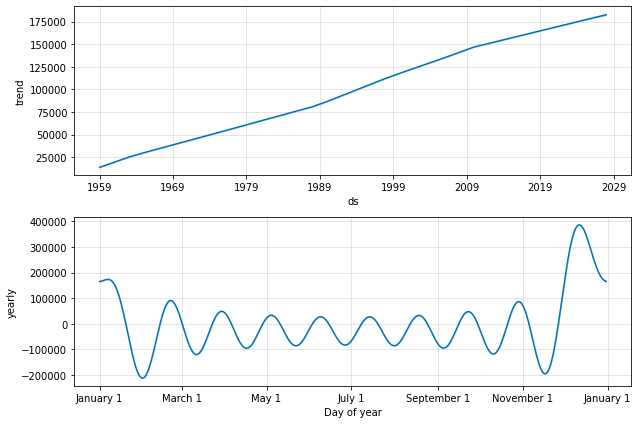

In [12]:
 
fig2 = m.plot_components(forecast)